# RMSE comparison
Compare two methods for calculating root-mean-square energy (RMSE) for signals.
1. Calculated from the audio samples, directly in the time domain.
2. By summing all the frequency bins' magnitudes after a short-time Fourier transform (STFT). 

In [1]:
import matplotlib.pyplot as plt
import librosa as lr
import numpy as np

# Load example audio file.
y, _ = lr.load(lr.util.example_audio_file())

# Make sure audio is equally divisible into the frame size.
frame_length = 2048
y = lr.util.fix_length(y, y.size - y.size % frame_length)
assert y.size % frame_length == 0

# Take STFT of audio and keep magnitudes.
S = lr.magphase(lr.stft(y, n_fft=frame_length))[0]
S_windowless = lr.magphase(lr.stft(y, n_fft=frame_length, window=np.ones, center=False))[0]

In [2]:
# Calculate RMS in time domain.
rmss1 = lr.feature.rmse(y=y)

# Calculate RMS in time-frequency domain without a windowing function.
rmss2 = lr.feature.rmse(S=S_windowless)

# Calculate RMS in time-frequency domain after windowing.
rmss3 = lr.feature.rmse(S=S)

# Normalize RMS envelopes.
rmss1, rmss2, rmss3 = map(lambda x: lr.util.normalize(x, axis=1), [rmss1, 
                                                                   rmss2, 
                                                                   rmss3])

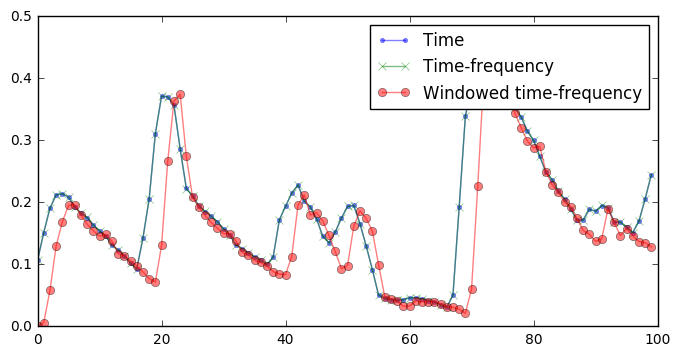

In [3]:
# Compare time domain RMS and time-frequency RMS. They should be roughly the same.
%matplotlib inline
plt.figure(figsize=(8,4))
plt.plot(rmss1.T[:100], marker='.', alpha=0.5)
plt.plot(rmss2.T[:100], marker='x', alpha=0.5)
plt.plot(rmss3.T[:100], marker='o', alpha=0.5)
plt.legend(['Time', 'Time-frequency', 'Windowed time-frequency']);